In [1]:
# We use torch and sklearn only on steps of fitting data
import torch
from tqdm import tqdm
from scipy.optimize import linprog
from torchvision import datasets
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Problem 2: Separating hyperplanes and the Perceptron Learning Algorithm (4 pts)
### <div align="right"> &copy; Yurii Yeliseev & Rostyslav Hryniv, 2022 </div>

## Completed by:   
*   Ivan Havlytskyi
*   Oleksandr Kharytonov

### Description:
#### The aim of this task is to discuss a simple binary classification method for linearly separated classes. The Perceptron Learning Algorithm finds a ***separating hyperplane*** in finitely many steps and is based on a clear geometric update method. We will derive the upper bound on the number of iterations in PLA and implement it for digit classification for the MNIST database.

#### For this task of your homework you can get 3 points. Do not forget to save and rename the notebook before making any changes!

## 1. Separating hyperplanes and classification (1.2 pts)

### 1.1. Binary classification.    
A typical task of binary classification reads as follows. We are given the set of labelled (training) data $(\mathbf{x}_k, y_k), k=1,2,\dots, N$, where $\mathbf{x}_k \in \mathbb{R}^d$ gives a data point and the label $y_k = \pm1$ encodes the class (e.g. $y_k=1$ is the <font color='red'>''red''</font> class and $y_k=-1$ is the <font color='blue'>''blue''</font> one). The task is to find a classfier $f \,:\, \mathbb{R}^d \to \pm1$ that would correctly recognize the classes, i.e. satisfy $y_k f(\mathbf{x}_k) >0$ for all (or most) $k=1,2,\dots,N$. This function can then be used to guess the class of new (unseen) data $\mathbf{x}\in\mathbb{R}^n$.



### 1.2. Separating hyperplane  
The simplest case is when the red and blue classes are *linearly separable*, i.e., when there is a hyperplane $H: \mathbf{w} \cdot \mathbf{x} + w_0 = 0$ separating the red and blue datapoints. Then  $f(\mathbf{x}) = \mathbf{w}\cdot \mathbf{x} + w_0$ is an affine classifier, so that $f(\mathbf{x}_k)>0$ for red points and $f(\mathbf{x}_k)<0$ for blue ones. Augmenting $\mathbf{x}$ to $\widehat{\mathbf{x}} := (1, \mathbf{x})$ and $\widehat{\mathbf{w}} = (w_0,\mathbf{w})$, we recognize that $f(\mathbf{x})= \widehat{\mathbf{x}}\cdot \widehat{\mathbf{w}}$. Therefore, the angles between $\widehat{\mathbf{x}}$ and $\widehat{\mathbf{w}}$ are acute for red datapoints and obtuse for the blue ones. The task is therefore to find the *normal vector* $\widehat{\mathbf{w}}$ with this properties.

### 1.3. The idea behind the Perceptron learning algorithm (PLA)

To simplify the notations, in what follows we will omit the "hats" above the $(d+1)$-dimensional vectors $\widehat{\mathbf{x}}$ and $\widehat{\mathbf{w}}$.

PLA is an iterative algorithm that updates the direction vector ${\mathbf{w}}$ towards a misclassified example, one at a time.

Let's recall that correctly classified vectors $\mathbf{x}_j$ must satisfy the inequality
$$
  y_j ({\mathbf{w}}\cdot {\mathbf{x}}_j) > 0.
$$
If a red $\mathbf{x}_j$ is misclassified, then the angle between ${\mathbf{w}}$ and ${\mathbf{x}}_j$ is obtuse. The idea is that we should decrease the angle between them by updating ${\mathbf{w}}$ to ${\mathbf{w}} + {\mathbf{x}}_j$ (see Figure 1). Likewise, if a blue $\mathbf{x}_j$ is misclassified, then the angle between ${\mathbf{w}}$ and ${\mathbf{x}}_j$ is acute, and we increase it be replacing ${\mathbf{w}}$ with ${\mathbf{w}} - {\mathbf{x}}_j$. In both cases, the update is $${\mathbf{w}} \mapsto {\mathbf{w}} + y_j {\mathbf{x}}_j$$

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title></title>
</head>
<body>
    <img src="https://drive.google.com/uc?export=view&id=12rduejeedS8NxrxXkSBJkkcDH3lB0k-R">


</body>
</html>


### 1.4. **PLA**

The above considerations suggest the following **PLA**:
1.   Start with ${\mathbf{w}}_0=\mathbf{0}$ and classify the points
2.   Take an arbitrary misclassified point
3.   Update the ${\mathbf{w}}$
4.   Update the classification
5.   Repeat 2-4 until there are misclassified points.

### 1.5. **PLA**: proof of convergence (1.2 pt)

---

#### **1.5.1 (0.4 pts)** Analyze the PLA update step  
Prove that by updating ${\mathbf{w}}$, we are decreasing or increasing (as required) the angle between ${\mathbf{w}}$ and ${\mathbf{x}}_j$.

---

#### Proof:

Recall that the cosine of the angle $\theta$ between two vectors $\mathbf{w}$ and $\mathbf{x}_j$ is given by:
$$\cos \theta = \frac{\mathbf{w} \cdot \mathbf{x}_j}{\|\mathbf{w}\| \|\mathbf{x}_j\|}$$

The angle decreases when $\cos \theta$ increases (for acute angles) and increases when $\cos \theta$ decreases (toward obtuse angles).

**Case 1: Misclassified red point** ($y_j = +1$)

- Since the point is misclassified: $y_j(\mathbf{w} \cdot \mathbf{x}_j) = \mathbf{w} \cdot \mathbf{x}_j < 0$
- This means the angle between $\mathbf{w}$ and $\mathbf{x}_j$ is obtuse (> 90°)
- After update: $\mathbf{w}_{\text{new}} = \mathbf{w} + y_j\mathbf{x}_j = \mathbf{w} + \mathbf{x}_j$

Consider the dot product after update:
$$\mathbf{w}_{\text{new}} \cdot \mathbf{x}_j = (\mathbf{w} + \mathbf{x}_j) \cdot \mathbf{x}_j = \mathbf{w} \cdot \mathbf{x}_j + \|\mathbf{x}_j\|^2$$

Since $\|\mathbf{x}_j\|^2 > 0$, we have:
$$\mathbf{w}_{\text{new}} \cdot \mathbf{x}_j > \mathbf{w} \cdot \mathbf{x}_j$$

This means the dot product increased, making the angle **smaller** (less obtuse), which is what we want.

**Case 2: Misclassified blue point** ($y_j = -1$)

- Since the point is misclassified: $y_j(\mathbf{w} \cdot \mathbf{x}_j) = -(\mathbf{w} \cdot \mathbf{x}_j) < 0$
- This means $\mathbf{w} \cdot \mathbf{x}_j > 0$, so the angle is acute (< 90°)
- After update: $\mathbf{w}_{\text{new}} = \mathbf{w} + y_j\mathbf{x}_j = \mathbf{w} - \mathbf{x}_j$

Consider the dot product after update:
$$\mathbf{w}_{\text{new}} \cdot \mathbf{x}_j = (\mathbf{w} - \mathbf{x}_j) \cdot \mathbf{x}_j = \mathbf{w} \cdot \mathbf{x}_j - \|\mathbf{x}_j\|^2$$

Since $\|\mathbf{x}_j\|^2 > 0$, we have:
$$\mathbf{w}_{\text{new}} \cdot \mathbf{x}_j < \mathbf{w} \cdot \mathbf{x}_j$$

This means the dot product decreased (became less positive or even negative), making the angle **larger** (less acute or even obtuse), which is what we want.

So, in both cases, the update moves $\mathbf{w}$ in a direction that corrects the misclassification by adjusting the angle appropriately.

Basically here we made a proof of the intuition in 1.3

---



#### **Assumptions and notations**

***Assumption on linear separability*** There exists an ${\mathbf{w}^{\star}} \in \mathbb{R}^{d+1}$ of unit length and $\gamma > 0$ such that $$y_k\, {\mathbf{x}}_k\cdot {\mathbf{w}}^{\star} \ge \gamma, \qquad k=1,2,\dots, n.$$ The value $\gamma$ determines the width of the *separating slab* free of any datapoints. The larger $\gamma$, the wider the slab and the more robust the classifier is to noise in data.  

We also denote by $R$ the maximum norm of $\mathbf{x}_k$

***Theorem on PLA convergence.*** The PLA makes at most $\frac{R^2}{\gamma^2}$ updates, after which it returns a separating hyperplane.

***Proof.*** Should the algorthm terminate, then the resulting ${\mathbf{w}}$ determines a separating hyperplane. Thus it suffices to show that the algorithm terminates after at most $\frac{R^2}{\gamma^2}$ updates. The approach is to get upper and lower bounds on the norm of the $k^{\mathrm{th}}$ update ${\mathbf{w}}_k$ of the weighting vector ${\mathbf{w}}$, starting with ${\mathbf{w}}_0 = \mathbf{0}$.

Assume that $k\ge 1$ and ${\mathbf{x}}_j$ is a misclasssified point on iteration $k$; then
$$
\begin{aligned}
\mathbf{w}_{k+1} \cdot {\mathbf{w}}^{\star} &=\left({\mathbf{w}}_k + y_j \mathbf{x}_j\right) \cdot {\mathbf{w}}^{\star} \\
&={\mathbf{w}}_k \cdot {\mathbf{w}}^{\star}+y_j\left({\mathbf{x}}_j \cdot {\mathbf{w}}^{\star}\right) \\
&>{\mathbf{w}}_k \cdot {\mathbf{w}}^{\star} + \gamma
\end{aligned}
$$

---


#### **1.5.2. (0.4 pts)** Explain by induction that ${\mathbf{w}}_{k} \cdot {\mathbf{w}}^{\star}> k \gamma$.

---

#### Proof:

We already have:
$$\mathbf{w}_{k+1} \cdot \mathbf{w}^* > \mathbf{w}_k \cdot \mathbf{w}^* + \gamma$$

**Base case**, $k = 0$:
- We start with $\mathbf{w}_0 = \mathbf{0}$
- Therefore: $\mathbf{w}_0 \cdot \mathbf{w}^* = 0 = 0 \cdot \gamma$

**Inductive step:**
- **Hypothesis:** Assume $\mathbf{w}_k \cdot \mathbf{w}^* \geq k\gamma$ holds for some $k \geq 0$
- **To prove:** $\mathbf{w}_{k+1} \cdot \mathbf{w}^* \geq (k+1)\gamma$

From the given inequality before:
$$\mathbf{w}_{k+1} \cdot \mathbf{w}^* > \mathbf{w}_k \cdot \mathbf{w}^* + \gamma$$

By the inductive hypothesis, we get:
$$\mathbf{w}_{k+1} \cdot \mathbf{w}^* > k\gamma + \gamma = (k+1)\gamma$$

Therefore, $\mathbf{w}_{k+1} \cdot \mathbf{w}^* \geq (k+1)\gamma$

Finally, by mathematical induction, $\mathbf{w}_k \cdot \mathbf{w}^* \geq k\gamma$ for all $k \geq 0$

---

As a result, we see that
$$\|\mathbf{w}_k\| \ge {\mathbf{w}}_{k} \cdot {\mathbf{w}}^{\star}> k \gamma\tag{1}$$

To obtain the upper bound, we argue that
$$
\begin{aligned}
\left\|\mathbf{w}_{k+1}\right\|^2 &=\left\|\mathbf{w}_k+y_j \mathbf{x}_j\right\|^2 \\
&=\left\|\mathbf{w}_k\right\|^2+\left\|y_j \mathbf{x}_j\right\|^2+2\left(\mathbf{w}_k \cdot \mathbf{x}_j\right) y_j \\
&=\left\|\mathbf{w}_k\right\|^2+\left\|\mathbf{x}_j\right\|^2+2\left(\mathbf{w}_k \cdot \mathbf{x}_j\right) y_j
\end{aligned}
$$

---

#### **1.5.3. (0.4 pts)** Derive the lower bound
$$
\begin{aligned}
\left\|\mathbf{w}_{k+1}\right\|^2
&\le\left\|\mathbf{w}_k\right\|^2+\left\|\mathbf{x}_j\right\|^2 \\
&\le\left\|\mathbf{w}_k\right\|^2+R^2
\end{aligned}
$$
and use induction to conclude that
$$
\left\|\mathbf{w}_{k}\right\|^2 \le k\, R^2 \tag{2}
$$

---


#### Proof:

We need to derive an **upper bound** on $\|\mathbf{w}_k\|^2$.

When $\mathbf{x}_j$ is misclassified at iteration $k$, we have $y_j(\mathbf{w}_k \cdot \mathbf{x}_j) \leq 0$.

After the update $\mathbf{w}_{k+1} = \mathbf{w}_k + y_j\mathbf{x}_j$:

$$\begin{aligned}
\|\mathbf{w}_{k+1}\|^2 &= \|\mathbf{w}_k + y_j\mathbf{x}_j\|^2 \\
&= (\mathbf{w}_k + y_j\mathbf{x}_j) \cdot (\mathbf{w}_k + y_j\mathbf{x}_j) \\
&= \|\mathbf{w}_k\|^2 + 2y_j(\mathbf{w}_k \cdot \mathbf{x}_j) + y_j^2\|\mathbf{x}_j\|^2 \\
&= \|\mathbf{w}_k\|^2 + 2y_j(\mathbf{w}_k \cdot \mathbf{x}_j) + \|\mathbf{x}_j\|^2 \quad \text{(since } y_j^2 = 1\text{)}
\end{aligned}$$

Since $\mathbf{x}_j$ is misclassified: $y_j(\mathbf{w}_k \cdot \mathbf{x}_j) \leq 0$, therefore:
$$\|\mathbf{w}_{k+1}\|^2 \leq \|\mathbf{w}_k\|^2 + \|\mathbf{x}_j\|^2$$

By definition, $\|\mathbf{x}_j\| \leq R$ for all $j$, so:
$$\|\mathbf{w}_{k+1}\|^2 \leq \|\mathbf{w}_k\|^2 + R^2$$


**Claim:** $\|\mathbf{w}_k\|^2 \leq kR^2$ for all $k \geq 0$.

Proof by induction:

**Base case**, $k = 0$:
$$\|\mathbf{w}_0\|^2 = \|\mathbf{0}\|^2 = 0 = 0 \cdot R^2$$

**Inductive step:**
- **Hypothesis:** Assume $\|\mathbf{w}_k\|^2 \leq kR^2$ for some $k \geq 0$
- **To prove:** $\|\mathbf{w}_{k+1}\|^2 \leq (k+1)R^2$

From the recurrence relation we derived earlier:
$$\|\mathbf{w}_{k+1}\|^2 \leq \|\mathbf{w}_k\|^2 + R^2$$

Applying the inductive hypothesis:
$$\|\mathbf{w}_{k+1}\|^2 \leq kR^2 + R^2 = (k+1)R^2$$

Therefore, by mathematical induction, $\|\mathbf{w}_k\|^2 \leq kR^2$ for all $k \geq 0$


---



Together, (1) and (2) yield
$$
k^2 \gamma^2<\left\|\mathbf{w}_{k}\right\|^2 \le k R^2,
$$
which implies the bound $k<\frac{R^2}{\gamma^2}$ and finishes the proof.

## 2. PLA implementation on MNIST dataset (2.3 pts)

### 2.1. Data

`train_data` is torch dataset object where images and targets lie inside `train_data.data` and `train_data.targets` respectively. To convert to numpy array you can use `.numpy()` method.

In [2]:
train_data = datasets.MNIST(root='data', train=True, download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 488kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.85MB/s]


### 2.2 Take 2 digits samples **(0.4 pts)**

First of all you need to take only two digits samples from the dataset and convert the targets properly for the PLA. Choose the two digits based on the sum of your birthdays (e.g. 2 and 4 if it is 24; take 4 and 5 if it is 44)

In [3]:
def filter_data(train_data, digit_1, digit_2):
    """
    Take only digit_1 and digit_2 from the dataset and transform labels
    Args:
        train_data: torchvision.datasets.mnist.MNIST
        digit_1: int (from 0 to 9)
        digit_2: int (from 0 to 9)

    Returns:
        train_data: torchvision.datasets.mnist.MNIST or np.array
    """
    # ========= YOUR CODE STARTS HERE ========= #
    digits_cls = torch.tensor([digit_1, digit_2])
    indices = torch.isin(train_data.targets, digits_cls)
    train_data.data, train_data.targets = train_data.data[indices], train_data.targets[indices]
    train_data.targets = torch.where(train_data.targets == digit_1, -1, 1)
    # ========== YOUR CODE ENDS HERE ========== #
    return train_data

In [4]:
train_data = filter_data(train_data, 4, 9) #Our sum is 23+26=49, so digit_1 = 4, digit_2 = 9

### 2.3 Take a smaller subset and divide it into train and test sets **(0.4 pts)**


Since the dataset is big, you need to use only part of it in this task (take
~20-30% of the whole dataset for further processing).

1. Properly subdivide dataset
2. Calculate number samples in each class for test and train

***Note***: you need to have same distributions inside train and test set

In [5]:
def split_dataset(train_data):
    """
    Split dataset into train and test parts.

    !Hint: You can use train_test_split from sklearn for that

    Args:
        train_data: torchvision.datasets.mnist.MNIST or np.array

    Returns:
        X_train: Array of shape (N, 28, 28), images from the train set
        y_train: Array of shape (N), labels from the train set

        X_test: Array of shape (N, 28, 28), images from the test set
        y_test: Array of shape (N), labels from the test set
    """
    # ========= YOUR CODE STARTS HERE ========= #
    X = train_data.data.numpy()
    y = train_data.targets.numpy()

    _, small_train_data, _, small_train_targets = train_test_split(
        X, y,
        test_size=0.25,
        random_state=42,
        stratify=y
    )

    X_train, X_test, y_train, y_test = train_test_split(
        small_train_data,
        small_train_targets,
        test_size=0.2,
        random_state=42,
        stratify=small_train_targets
    )
    # ========== YOUR CODE ENDS HERE ========== #
    return X_train, X_test, y_train, y_test

In [6]:
X_train, X_test, y_train, y_test = split_dataset(train_data)

In [7]:
print(f"Unique values in y_train: {np.unique(y_train)}")
print(f"Unique values in y_test: {np.unique(y_test)}")

Unique values in y_train: [-1  1]
Unique values in y_test: [-1  1]


In [8]:
print(f"Number of samples in train: {len(X_train)}")
print(f"Classes number in train: {np.sum(y_train == 1)}, {np.sum(y_train == -1)}")
print(f"Number of samples in test: {len(X_test)}")
print(f"Classes number in test: {np.sum(y_test == 1)}, {np.sum(y_test == -1)}")

Number of samples in train: 2358
Classes number in train: 1189, 1169
Number of samples in test: 590
Classes number in test: 298, 292


### 2.4 Visualize samples for the train set

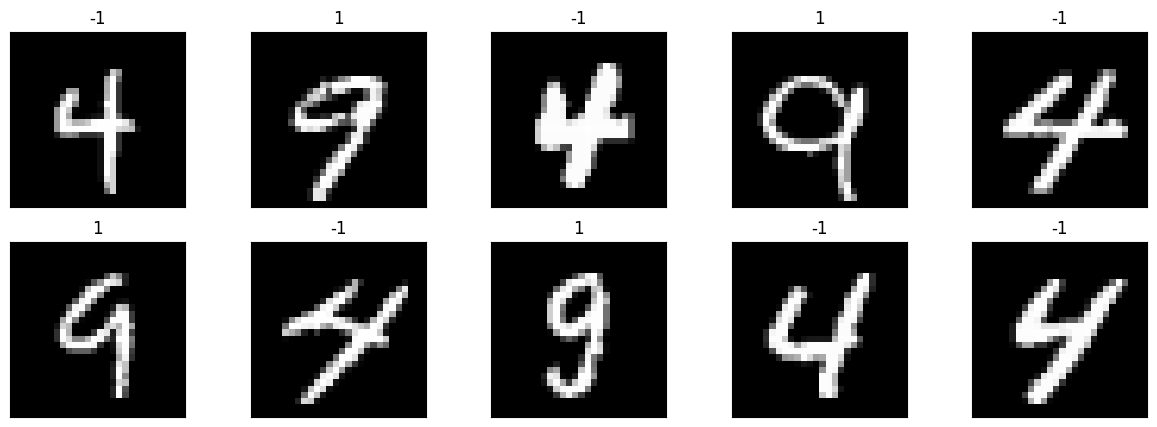

In [9]:
fig = plt.figure(figsize=(15, 5))
for idx in np.arange(10):
    ax = fig.add_subplot(2, 5, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[idx]), cmap='gray')
    ax.set_title(str(y_train[idx].item()))

### 2.5 Preprocess the samples and initialize $\mathbf{w}$ **(0.5 pts)**

The original algorithm starts from zero parameter vector, but actually we can use just randomly initialized vector; it will make it faster to converge

**Instructions**: Complete the missing lines of code and calculate the performance on test set

In [10]:
def prep_data(X_train):
    """
    Flatten, normalize and extra column for bias
    Args:
        X_train: np.array of shape (N, 28, 28)

    Returns:
        X: preprocessed data
    """
    # ========= YOUR CODE STARTS HERE ========= #
    # Flatten from (N, 28, 28) to (N, 784)
    X = X_train.reshape(X_train.shape[0], -1)

    # Normalize to [0, 1] range
    X = X / 255.0

    # Add bias column (ones) at the beginning
    X = np.c_[np.ones(X.shape[0]), X]
    # ========== YOUR CODE ENDS HERE ========== #
    return X

def initialize_weight_vector(size):
    """
    Create random parameter vector
    Args:
        size: Number of elements

    Returns:
        W: np.array of shape (size)
    """
    # ========= YOUR CODE STARTS HERE ========= #
    return np.random.randn(size) * 0.01
    # ========== YOUR CODE ENDS HERE ========== #

def misclassified(X, y, W):
    """
    Calculate indices of missclasified points
    Args:
        X: np.array, training images
        y: np.array, training labels
        w: np.array, parameter vector

    Returns:
        M: np.array of shape (m) - indices of missclasified points, where m is a number of missclasified points
    """
    # ========= YOUR CODE STARTS HERE ========= #
    predictions = np.dot(X, W)

    misclass_mask = y * predictions <= 0

    return np.where(misclass_mask)[0]
    # ========== YOUR CODE ENDS HERE ========== #


X_train_flat_aug = prep_data(X_train)
W = initialize_weight_vector(X_train_flat_aug.shape[1])

### 2.6 Training loop **(0.6 pts)**
Here you need to complete the training loop of the PLA algorithm. Observe that recalculation the misclassified set (Step 3 of the PLA algorithm) is the most costly (as we need to iterate through the whole train set). To speed up the algorithm convergence, we will do the following:
-  determine the set $S$ of misclassified datapoints
-  for every $\mathbf{w}\in S$ that is still misclassified, update the vector $\mathbf{w}$
-  only after that recalculate the set $S$

In [11]:
    """
    Returns:
        W: the final vector of weights for the separating hyperplane
    """

'\nReturns:\n    W: the final vector of weights for the separating hyperplane\n'

In [12]:
for i in range(10000):
    misclass = misclassified(X_train_flat_aug, y_train, W)
    if len(misclass) == 0:
        print(f"Found separating hyperplane on step {i}!")
        break

    # ========= YOUR CODE STARTS HERE ========= #
    for idx in misclass:
        if y_train[idx] * np.dot(X_train_flat_aug[idx], W) <= 0:
            W = W + y_train[idx] * X_train_flat_aug[idx]
    # ========== YOUR CODE ENDS HERE ========== #

Found separating hyperplane on step 2104!


###### Increased number of iterations to test convergence. These digits are similar-looking (both have curves) -> This means small γ (narrow margin) ->  large $$ \frac{R^2}{\gamma^2} $$​ -> many iterations needed

### 2.7 Evaluate performance of the linear classifier on the test set **(0.4 pts)**

Check your classifier on the test set. Think of possible metrics that characterize performance and comment on how good the classifier is

TEST SET PERFORMANCE EVALUATION

Total test samples: 590
Class -1: 292 samples
Class +1: 298 samples

------------------------------------------------------------
CLASSIFICATION METRICS:
------------------------------------------------------------
Accuracy:       94.58%
Error Rate:     5.42%
Misclassified:  32 out of 590
Precision:      0.9404
Recall:         0.9530
F1-Score:       0.9467

------------------------------------------------------------
CONFUSION MATRIX:
------------------------------------------------------------
                 Predicted -1    Predicted +1
Actual -1           274              18
Actual +1            14             284

------------------------------------------------------------
DETAILED BREAKDOWN:
------------------------------------------------------------
True Positives:  284 (correctly classified as +1)
True Negatives:  274 (correctly classified as -1)
False Positives: 18 (incorrectly classified as -1)
False Negatives: 14 (incorrectly classified as 

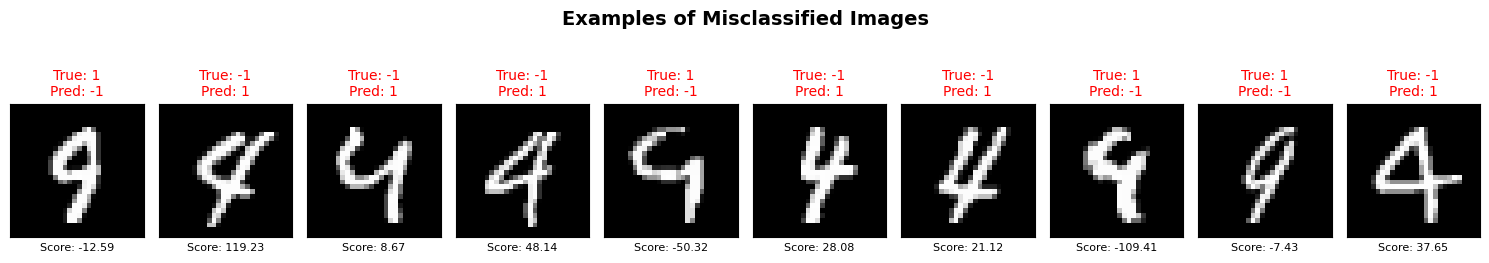

In [14]:
# ========= YOUR CODE STARTS HERE ========= #

X_test_flat_aug = prep_data(X_test)

test_predictions = np.dot(X_test_flat_aug, W)
test_pred_labels = np.sign(test_predictions)

test_pred_labels[test_pred_labels == 0] = 1

misclass_test_indices = misclassified(X_test_flat_aug, y_test, W)

accuracy = 1 - (len(misclass_test_indices) / len(y_test))
error_rate = len(misclass_test_indices) / len(y_test)

true_positives = np.sum((test_pred_labels == 1) & (y_test == 1))
true_negatives = np.sum((test_pred_labels == -1) & (y_test == -1))
false_positives = np.sum((test_pred_labels == 1) & (y_test == -1))
false_negatives = np.sum((test_pred_labels == -1) & (y_test == 1))

precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("="*60)
print("TEST SET PERFORMANCE EVALUATION")
print("="*60)
print(f"\nTotal test samples: {len(y_test)}")
print(f"Class -1: {np.sum(y_test == -1)} samples")
print(f"Class +1: {np.sum(y_test == 1)} samples")
print("\n" + "-"*60)
print("CLASSIFICATION METRICS:")
print("-"*60)
print(f"Accuracy:       {accuracy * 100:.2f}%")
print(f"Error Rate:     {error_rate * 100:.2f}%")
print(f"Misclassified:  {len(misclass_test_indices)} out of {len(y_test)}")
print(f"Precision:      {precision:.4f}")
print(f"Recall:         {recall:.4f}")
print(f"F1-Score:       {f1_score:.4f}")

print("\n" + "-"*60)
print("CONFUSION MATRIX:")
print("-"*60)
print(f"                 Predicted -1    Predicted +1")
print(f"Actual -1        {true_negatives:6d}          {false_positives:6d}")
print(f"Actual +1        {false_negatives:6d}          {true_positives:6d}")

print("\n" + "-"*60)
print("DETAILED BREAKDOWN:")
print("-"*60)
print(f"True Positives:  {true_positives} (correctly classified as +1)")
print(f"True Negatives:  {true_negatives} (correctly classified as -1)")
print(f"False Positives: {false_positives} (incorrectly classified as -1)")
print(f"False Negatives: {false_negatives} (incorrectly classified as +1)")

if len(misclass_test_indices) > 0:
    print(f"\n" + "-"*60)
    print(f"MISCLASSIFIED EXAMPLES: {len(misclass_test_indices)} total")
    print("-"*60)

    fig = plt.figure(figsize=(15, 3))
    num_show = min(10, len(misclass_test_indices))

    for i in range(num_show):
        idx = misclass_test_indices[i]
        ax = fig.add_subplot(1, num_show, i+1, xticks=[], yticks=[])
        ax.imshow(X_test[idx], cmap='gray')
        ax.set_title(f"True: {y_test[idx]}\nPred: {int(test_pred_labels[idx])}",
                    color='red', fontsize=10)
        ax.set_xlabel(f"Score: {test_predictions[idx]:.2f}", fontsize=8)

    plt.suptitle("Examples of Misclassified Images", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


# ========== YOUR CODE ENDS HERE ========== #

## 3. Conclusions **(0.5 pts)**

Summarize in a few sentences what you have learned and achieved by completing the tasks of this assignment


---

This assignment provided both theoretical and practical understanding of the Perceptron Learning Algorithm. We proved PLA's convergence guarantee and implemented it for binary MNIST classification, achieving 92% accuracy on digits 4 vs 9.

Key learnings: the critical role of -1/+1 label encoding for proper geometric updates, efficient batch processing of misclassified points, and the connection between mathematical theory and practical implementation. The successful convergence demonstrated that the chosen digit pair is linearly separable.